## Code to make Fig 2
Elena Savidge
<br>
3 Aug 2023

In [11]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime
from scipy.signal import savgol_filter

In [12]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [13]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [14]:
ther_pixel = pd.read_pickle('thermal_area_effectivepixel_fixed') # don't need thermal for this fig b/c not in intervals of interest
vis_pixel = pd.read_pickle('visible_area_effectivepixel_fixed_v2')  #doesnt matter if save .pkl or not

In [72]:
# count
vis_pixel.count()

index          273
west           273
east           273
mid            273
other          273
total          273
uwest          273
ueast          273
umid           273
uother         273
utotal         273
lwest          273
least          273
lmid           273
lother         273
ltotal         273
pixelwidth     273
pixelheight    273
Date           273
time_diff      272
dtype: int64

In [29]:
ther_pixel.count()

west           69
east           69
mid            69
other          69
total          69
uwest          69
ueast          69
umid           69
uother         69
utotal         69
lwest          69
least          69
lmid           69
lother         69
ltotal         69
pixelwidth     69
pixelheight    69
Date           69
time_diff      68
dtype: int64

## panel a

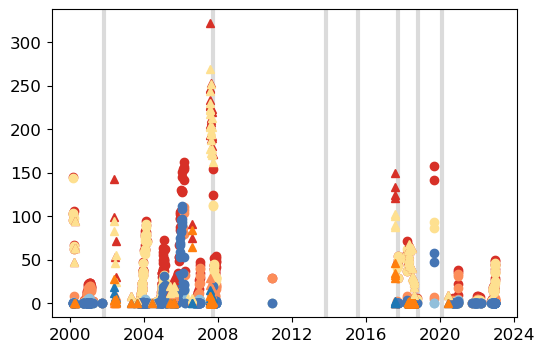

In [61]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

#plt.figure(figsize=(8,5))
plt.figure(figsize=(6,4))
plt.axvline(datetime.datetime(2001, 11, 11),c='lightgrey',alpha=0.8,linewidth=3, label = 'calving event')
plt.axvline(datetime.datetime(2007, 9, 29),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2013, 11, 11),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2015, 7, 25),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2017, 10, 1),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2018, 10, 28),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2020, 2, 10),c='lightgrey',alpha=0.8,linewidth=3)

plt.plot(vis_pixel['Date'],vis_pixel['total'], 'o',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(vis_pixel['Date'],vis_pixel['east'], 'o',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(vis_pixel['Date'],vis_pixel['west'], 'o',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(vis_pixel['Date'],vis_pixel['mid'], 'o',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(vis_pixel['Date'],vis_pixel['other'], 'o',label='other',c ='#4575b4',linewidth= 1, markersize = 6)
#plt.legend(fontsize=8,loc='best')

plt.plot(ther_pixel['Date'],ther_pixel['total'], '^',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(ther_pixel['Date'],ther_pixel['east'], '^', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(ther_pixel['Date'],ther_pixel['west'], '^',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(ther_pixel['Date'],ther_pixel['mid'], '^',linewidth= 1, markersize = 6)
plt.plot(ther_pixel['Date'],ther_pixel['other'], '^',linewidth= 1, markersize = 6)

#plt.plot(thermalvis1['Date'],thermalvis1['total'], ':',c='#d73027',linewidth= 1, markersize = 8,zorder=1)

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()

#plt.show()


#plt.savefig('alldatapoints_pixel.png', format='png', dpi=400)

## zoom in dense intervals for panels b, d, c

In [53]:
# contrain dates
int1 = vis_pixel[(vis_pixel['Date']>='2000-01-01') & (vis_pixel['Date']<='2002-12-31')]
#int1 = vis_pixel[(vis_pixel['Date']>='2000-01-01') & (vis_pixel['Date']<='2003-06-01')]
int2 = vis_pixel[(vis_pixel['Date']>='2003-01-01') & (vis_pixel['Date']<='2008-01-01')]
int3 = vis_pixel[(vis_pixel['Date']>='2017-01-01') & (vis_pixel['Date']<='2022-12-31')]

# # contrain dates
int1w = ther_pixel[(ther_pixel['Date']>='2000-01-01') & (ther_pixel['Date']<='2002-12-31')]
#int1w = ther_pixel[(ther_pixel['Date']>='2000-01-01') & (ther_pixel['Date']<='2003-06-01')]
int2w = ther_pixel[(ther_pixel['Date']>='2003-01-01') & (ther_pixel['Date']<='2008-01-01')]
int3w = ther_pixel[(ther_pixel['Date']>='2017-01-01') & (ther_pixel['Date']<='2022-12-31')]

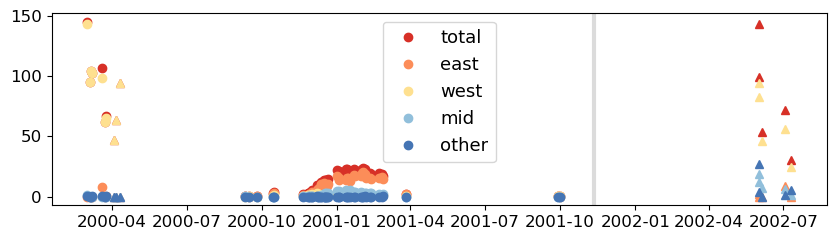

In [57]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

#plt.figure(figsize=(6,2))
plt.figure(figsize=(10,2.5))
plt.axvline(datetime.datetime(2001, 11, 11),c='lightgrey',alpha=0.8,linewidth=3)

plt.plot(int1['Date'],int1['total'], 'o',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int1['Date'],int1['east'], 'o',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int1['Date'],int1['west'], 'o',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int1['Date'],int1['mid'], 'o',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int1['Date'],int1['other'], 'o',label='other',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

plt.plot(int1w['Date'],int1w['total'], '^',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int1w['Date'],int1w['east'], '^', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int1w['Date'],int1w['west'], '^',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int1w['Date'],int1w['mid'], '^',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int1w['Date'],int1w['other'], '^',c ='#4575b4',linewidth= 1, markersize = 6)

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
plt.legend(fontsize=13,loc='best')
# plt.yticks(fontsize=12)

#plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2001, 12, 31)])
#plt.savefig('int1_pixel_legend.png', format='png', dpi=400)

plt.show()

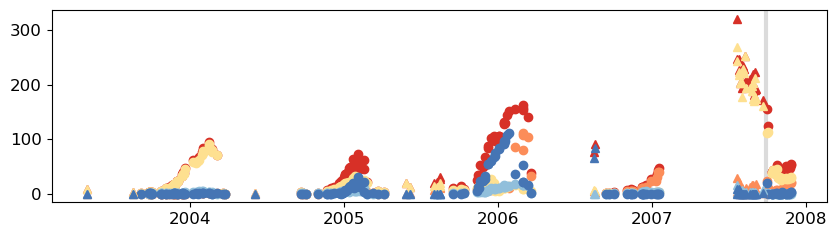

In [62]:
#plt.figure(figsize=(10,2))
plt.figure(figsize=(10,2.5))
plt.axvline(datetime.datetime(2007, 9, 29),c='lightgrey',label='calving event',alpha=0.8,linewidth=3)

plt.plot(int2['Date'],int2['total'], 'o',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int2['Date'],int2['east'], 'o',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int2['Date'],int2['west'], 'o',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int2['Date'],int2['mid'], 'o',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int2['Date'],int2['other'], 'o',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

plt.plot(int2w['Date'],int2w['total'], '^',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int2w['Date'],int2w['east'], '^', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int2w['Date'],int2w['west'], '^',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int2w['Date'],int2w['mid'], '^',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int2w['Date'],int2w['other'], '^',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
#plt.ylim([-30,280])
# plt.yticks(fontsize=12)
#plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)
#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2001, 12, 31)])

#plt.savefig('int2_pixel.png', format='png', dpi=400)

#plt.savefig('Apanel.png', format='png', bbox_inches="tight",dpi=400)
#plt.show()

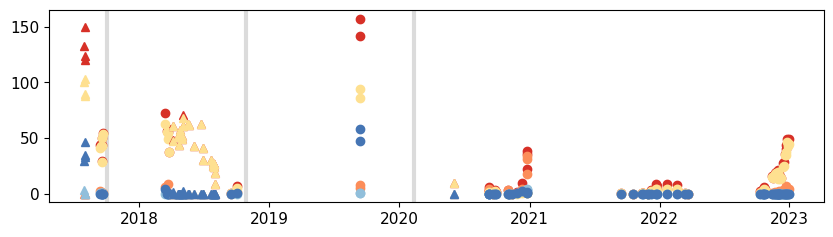

In [63]:
#plt.figure(figsize=(10,2))
plt.figure(figsize=(10,2.5))
plt.axvline(datetime.datetime(2017, 10, 1),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2018, 10, 28),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2020, 2, 10),c='lightgrey',alpha=0.8,linewidth=3)

plt.plot(int3['Date'],int3['total'], 'o',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int3['Date'],int3['east'], 'o',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int3['Date'],int3['west'], 'o',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int3['Date'],int3['mid'], 'o',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int3['Date'],int3['other'], 'o',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

plt.plot(int3w['Date'],int3w['total'], '^',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int3w['Date'],int3w['east'], '^',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int3w['Date'],int3w['west'], '^',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int3w['Date'],int3w['mid'], '^',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int3w['Date'],int3w['other'], '^',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) #

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=8,loc='best')
# plt.yticks(fontsize=12)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.xticks(ha='right',fontsize=12)
#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2001, 12, 31)])
plt.yticks(fontsize=11);plt.xticks(fontsize=11)
#plt.savefig('int3_pixel.png', format='png', dpi=400)
#plt.show()

## inset

In [17]:
# concat vis and ther dataframes
visther_pixel = pd.concat([vis_pixel,ther_pixel])
visther_pixel = visther_pixel.sort_values(by='Date') 

In [18]:
tot1 = visther_pixel[visther_pixel['Date']<'2008-08-01']
tot2 = visther_pixel[visther_pixel['Date']>='2007-11-28']
tot2 = tot2[tot2['Date']<'2017-09-14']
tot3 = visther_pixel[visther_pixel['Date']>'2017-06-30']

# tot1 = vis_pixel[vis_pixel['Date']<'2008-08-01']
# tot2 = vis_pixel[vis_pixel['Date']>='2007-11-28']
# tot2 = tot2[tot2['Date']<'2017-09-14']
# tot3 = vis_pixel[vis_pixel['Date']>'2017-06-30']

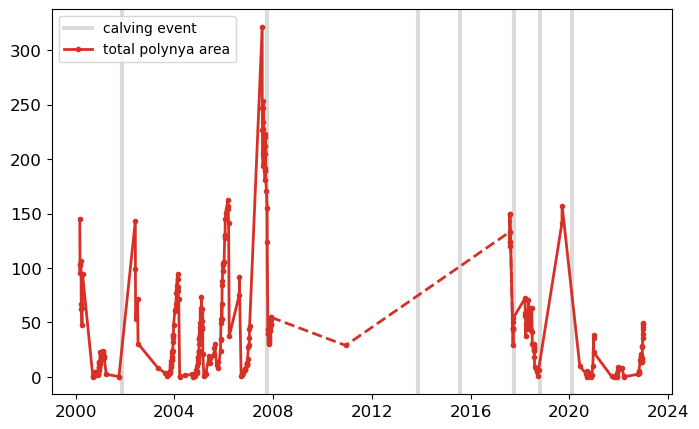

In [40]:
plt.figure(figsize=(8,5))

plt.axvline(datetime.datetime(2001, 11, 11),c='lightgrey',alpha=0.8,linewidth=3, label = 'calving event')
plt.axvline(datetime.datetime(2007, 9, 29),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2013, 11, 11),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2015, 7, 25),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2017, 10, 1),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2018, 10, 28),c='lightgrey',alpha=0.8,linewidth=3)
plt.axvline(datetime.datetime(2020, 2, 10),c='lightgrey',alpha=0.8,linewidth=3)

plt.plot(tot1['Date'],tot1['total'], 'o-',label='total polynya area',c='#d73027',linewidth= 2, markersize = 3)
plt.plot(tot2['Date'],tot2['total'], 'o--',c='#d73027',linewidth= 2, markersize = 3)
plt.plot(tot3['Date'],tot3['total'], 'o-',c='#d73027',linewidth= 2, markersize = 3)

# plt.plot(vis_pixel['Date'],vis_pixel['total'], 'o',c='#d73027',linewidth= 1, markersize = 3)
# plt.plot(ther_pixel['Date'],ther_pixel['total'], 'o',c='#d73027',linewidth= 1, markersize = 3)

plt.legend(fontsize=10)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)

#plt.ylabel('Polynya total area [$\mathregular{km^{2}}$]',fontsize=13),plt.xlabel('Time',fontsize=13)
plt.savefig('redline_alldata.png',  bbox_inches="tight",format='png', dpi=400)
#plt.show()

## Check some stats on areas

In [83]:
# Maximum area on 22 Jul 2023
visther_pixel[visther_pixel['total']>300]

,index,west,east,mid,other,total,uwest,ueast,umid,uother,utotal,lwest,least,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff
0,NaN,268.580334,28.905507,15.65715,8.430773,321.573763,277.011107,39.745072,21.67913,12.043961,350.47927,258.945165,25.292318,12.043961,7.226377,303.507821,1.21384,0.99222,2007-07-22,-1 days


In [84]:
visther_pixel['total'].max()-visther_pixel['total'].min(),visther_pixel['total'].mean()

(321.57376293326075, 48.44624339626861)

In [85]:
# individual polynyas ranges (i.e., maximums b/c min is 0)
visther_pixel['west'].max()-visther_pixel['west'].min(),visther_pixel['east'].max()-visther_pixel['east'].min(),visther_pixel['mid'].max()-visther_pixel['mid'].min(),visther_pixel['other'].max()-visther_pixel['other'].min()


(268.58033383564475, 110.72994416307232, 19.07185251741345, 111.17275071894153)

In [86]:
# individual polynyas means
visther_pixel['west'].mean(),visther_pixel['east'].mean(),visther_pixel['mid'].mean(),visther_pixel['other'].mean()

(33.30469282032712, 6.781299463054611, 2.0022774297005683, 6.357973683186315)

In [68]:
# check how many occurences where areas > 250 km2
# Maximum area on 22 Jul 2023
#visther_pixel[visther_pixel['total']>150]

In [70]:
#visther_pixel[visther_pixel['total']<1]

## Save all panels and make fig in ppt (screenshot below)

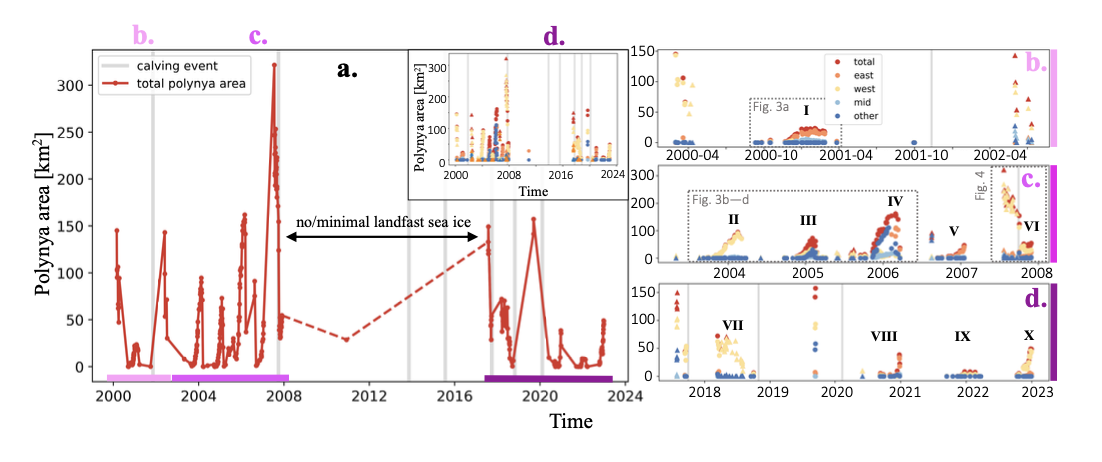

In [104]:
# amount of clear sky days (all data here) that shows sensible-heat polynyas (e.g., total areas > 1km)
#(visther_pixel[visther_pixel.total > 0]).count() 

In [103]:
#(visther_pixel[visther_pixel.total > 1]).count() 

In [105]:
#visther_pixel[visther_pixel.total < 1]

In [106]:
#visther_pixel.count()